Markowitz efficient frontier states investors should consider multiple securities in a portfolio rather than individually. A portfolio that contains combination of securities with low correlation can benefit from a diversification effect. Meaning investors can optimize their return without assuming additional risk. Markowitz 

In [2]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

WE will download the data on PG stock and ^GSPC

In [74]:
tickers = ["PG","AAPL","^GSPC"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source = "yahoo", start = "2012-1-1", end = "2018-12-31")["Adj Close"]

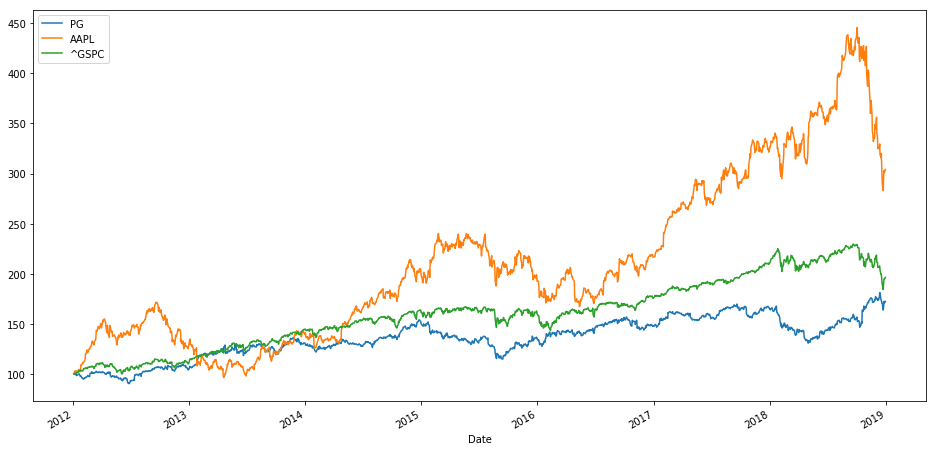

In [75]:
#normalize the data
(data/data.iloc[0]*100).plot(figsize = (16,8))
plt.show()

Calculate the daily change, returns of both securties

In [76]:
simple_returns = (data/data.shift(1)) - 1

In [77]:
#we will check if the data matches and have equal values - > 2494 PG and 2494 ^GSPC
simple_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2012-01-03 to 2018-12-31
Data columns (total 3 columns):
PG       1759 non-null float64
AAPL     1759 non-null float64
^GSPC    1759 non-null float64
dtypes: float64(3)
memory usage: 55.0 KB


In [78]:
#check the tail end of the data to check for most current date
simple_returns.tail()

,PG,AAPL,^GSPC
Date,,,
2018-12-24,-0.039683,-0.025874,-0.027112
2018-12-26,0.031250,0.070422,0.049594
2018-12-27,0.021423,-0.006490,0.008563
2018-12-28,-0.009128,0.000512,-0.001242
2018-12-31,0.008116,0.009665,0.008492


In [79]:
simple_returns.cov() * 250

,PG,AAPL,^GSPC
PG,0.021513,0.008269,0.009302
AAPL,0.008269,0.064337,0.017882
^GSPC,0.009302,0.017882,0.016424


In [80]:
#the correlation between PF and ^GSPC is positive but low so the portfolio should benefit from 
#markowitz diversification effect
simple_returns.corr()

,PG,AAPL,^GSPC
PG,1.000000,0.222254,0.494857
AAPL,0.222254,1.000000,0.550104
^GSPC,0.494857,0.550104,1.000000


In [81]:
# portfolio optimization -> We will need the count of securities in the portfolio
port_asset = len(tickers)
print(f"The number of securties in the portfolio is {port_asset}")

The number of securties in the portfolio is 3


WE will need the expected returns and the volatility to simulate a mean variance combination with 1000 simulations. WE are considering 1000 combinations of the same 2 assets of their weight values not 1000 different investments.

In [82]:
#Bellow we will run a simulation of 1000 differenct portfolio that contain PG and ^GSPC to test Markowitz theory.
#This Will provide us with both 1000 different expected returns and 1000 volatility values

portfolio_returns = []
portfolio_volatilities = []
weights1 = []
weights2 = []

for x in range(1000):
    weights = np.random.random(port_asset)
    weights[0] = weights[0]/np.sum(weights)
    weights[1] = weights[1]/np.sum(weights)
    weights /= np.sum(weights)
    weights1.append(weights[0])
    weights2.append(weights[1])
    portfolio_returns.append(np.sum(weights * simple_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(simple_returns.cov() * 250, weights))))
    
    # we will need to convert the volatilities and and the ezpected returns into a numpy array 
port_Returns = np.array(portfolio_returns)
port_Vol = np.array(portfolio_volatilities)

In [83]:
df2 = pd.DataFrame(port_Returns, columns=["Returns"])
df2["Risk"] = port_Vol
df2["Weight  PG"] = weights1
df2["Weight ^GSPC"] = weights2

In [84]:
df2.tail()

,Returns,Risk,Weight PG,Weight ^GSPC
995,0.143639,0.162839,0.292235,0.513278
996,0.139925,0.156713,0.296440,0.470971
997,0.123617,0.134107,0.200322,0.263837
998,0.120881,0.134790,0.050964,0.204210
999,0.124808,0.135518,0.194460,0.276555


In [85]:
portfolios = pd.DataFrame({"Volatility": port_Vol, "Returns": port_Returns})

In [86]:
portfolios.head()

,Volatility,Returns
0,0.137022,0.125926
1,0.208555,0.168554
2,0.147375,0.133955
3,0.166756,0.145605
4,0.164109,0.142727


In [87]:
portfolios.tail()

,Volatility,Returns
995,0.162839,0.143639
996,0.156713,0.139925
997,0.134107,0.123617
998,0.134790,0.120881
999,0.135518,0.124808


In [88]:
portfolios["Volatility"].min()

0.11748619967782781

In [89]:
portfolios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Volatility    1000 non-null float64
Returns       1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


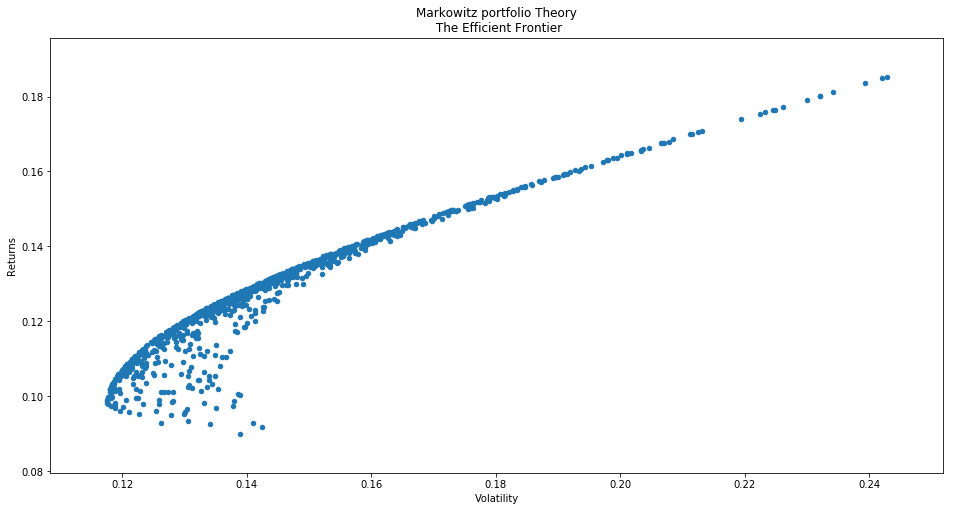

In [90]:
portfolios.plot(x ="Volatility", y ="Returns", kind = "scatter", figsize = (16,8))
plt.title("Markowitz portfolio Theory\n The Efficient Frontier")
plt.show()

THe above graph shows a set of 1000 portfolios of different weights containing Apple, PG & ^GSPC,  and displays the typical shape of Markowitz efficient portfolio. There are a set of efficient portfoilios that can provide a higher rate of return for the same or lower risk. The starting point is the minimum variance portfolio. 

As you can see here the effieicnt frontier tells us that with apple in the mix we can get a higher return at 18% with a volatility of 24%. The tangaant line though will be at the .12 volatility point with a .10 return (10%) 